In [2]:
import torch
from torch.distributions import Normal
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

[]

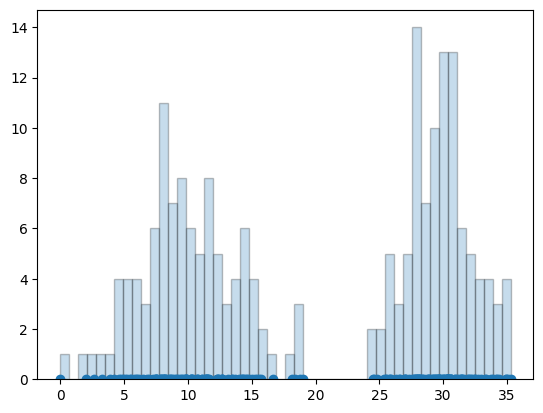

In [3]:
n = 100
mu1 = 10.0
sigma1 = 3.6
mu2 = 30.0
sigma2 = 2.6

# 1)
# Generates data that follows two gaussian distributions based on a set of parameters.
def generate_data(n, mu1, sigma1, mu2, sigma2):

  # Generate distributions
  normal_dist1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))
  normal_dist2 = torch.distributions.Normal(torch.tensor([mu2]), torch.tensor([sigma2]))

  # Take a sample from each dist
  gaussian_sample1 = normal_dist1.sample((n,1)).squeeze()
  gaussian_sample2 = normal_dist2.sample((n,1)).squeeze()

  # Concatenate the 2 samples
  X =  torch.cat((gaussian_sample1, gaussian_sample2))
  return X

X = generate_data(n, mu1, sigma1, mu2, sigma2)
#print(X)

# a) Scatter Plot with histograms
# Histograms
plt.hist(X, bins=50, alpha=0.25, histtype='bar', ec='black')
# Scatter
plt.scatter(X,torch.zeros(len(X)))
# Density
# TODO
plt.plot()



In [6]:
def init_random_parameters(range=50):
  return torch.rand((2, 2))*range

P = init_random_parameters()
print(P)

tensor([[13.2531, 18.6992],
        [46.4031, 48.9600]])


In [5]:
def calculate_log_likelihood_gaussian_observation(x, mu, sigma):
  # TODO: (ESTA ES LA QUE HICIMOS EN LA CLASE)
  # Nota: tal vez deberíamos poner en el latex el proceso desde la función de likelihood sin log hasta esta versión
  N = x.shape[0]
  return -(N / 2) * torch.log(torch.tensor(2 * torch.pi)) - N * torch.log(torch.tensor(sigma)) - (1 / (2 * sigma**2)) * torch.sum((x - mu) ** 2)

# Esta es la que usamos en la clase del gradient descent
def log_likelihood(x_sample, mu, sigma):
    N = x_sample.shape[0]
    log_likelihood = -N * torch.log(torch.tensor(sigma))  - (1 / (2 * sigma ** 2)) * torch.sum((x_sample - mu) ** 2)
    return log_likelihood